In [37]:
#Importing relevant libraries for the further programming. 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#Read Dataset
cleaned_df = pd.read_excel('SpotifyDataIt3.xlsx')

# Print column names to inspect
print(cleaned_df.columns)

cleaned_df

Index(['artists_num', 'album_num_tracks', 'peak_rank', 'weeks_on_chart',
       'streams', 'danceability', 'energy', 'key', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration', 'release_year', 'release_month', 'release_day',
       'release_dayofweek', 'loudness_log', 'energy_danceability_interaction'],
      dtype='object')


,artists_num,album_num_tracks,peak_rank,weeks_on_chart,streams,danceability,energy,key,speechiness,acousticness,...,liveness,valence,tempo,duration,release_year,release_month,release_day,release_dayofweek,loudness_log,energy_danceability_interaction
0,1,15,4,36.50000,37158272,0.752,0.620,5,0.0509,0.30900,...,0.0750,0.962,117.399,164459,2021,4,22,3,3.399162,0.466240
1,2,1,46,9.00000,215055522,0.748,0.627,7,0.0639,0.13100,...,0.0852,0.524,120.963,188491,2017,3,23,3,3.382558,0.468996
2,1,13,61,2.00000,48580,0.585,0.683,8,0.0523,0.73700,...,0.1140,0.493,128.018,157987,2022,2,14,0,3.454675,0.399555
3,1,1,112,1.50000,9944865,0.353,0.755,1,0.7330,0.08220,...,0.3900,0.437,191.153,193680,2018,6,15,4,3.374134,0.266515
4,1,12,44,129.30303,429376201,0.352,0.911,1,0.0747,0.00121,...,0.0995,0.236,148.033,222973,2004,1,1,3,3.409331,0.320672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,1,1,4,27.00000,6885448,0.812,0.634,8,0.1630,0.05640,...,0.2760,0.463,124.074,174194,2020,12,18,4,3.418218,0.514808
25836,3,1,7,10.00000,421278,0.792,0.469,8,0.1070,0.33300,...,0.0725,0.353,114.017,144737,2022,2,4,4,3.325360,0.371448
25837,1,7,40,8.50000,11300755,0.415,0.504,9,0.0318,0.02200,...,0.3630,0.401,165.860,155714,2018,10,5,4,3.237580,0.209160
25838,2,11,171,1.50000,13137028,0.744,0.715,0,0.3510,0.10100,...,0.0919,0.340,154.962,179773,2017,2,24,4,3.380042,0.531960


In the code below, we initiate the training of DecisionTreeRegressor (DT) and split the data into training and test

In [38]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Selecting relevant columns for the model
# 'streams' is the target variable and excluding highly categorical columns for simplicity
relevant_columns = ['artists_num', 'album_num_tracks', 'peak_rank', 'weeks_on_chart','streams', 'danceability', 'energy', 'key', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','duration', 'release_year', 'release_month', 'release_day',
'release_dayofweek', 'loudness_log', 'energy_danceability_interaction',]
data_for_model = cleaned_df[relevant_columns]


# Splitting the data into training and testing sets
X = data_for_model.drop('streams', axis=1)
y = data_for_model['streams']

# Test size is 30% and training are 70%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Decision Tree Regressor and adjusting model complexity
# Models complexity have been selected based on several tries, and what performed the "best".
dt_regressor = DecisionTreeRegressor(max_depth=5, min_samples_split=20, min_samples_leaf=15, random_state=0)

#Fitting the model
dt_regressor.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = dt_regressor.predict(X_test)

#Calculating MSE, RMSE and R-squared 
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Returning the evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 3157696158114045.0
Root Mean Squared Error: 56193381.79994193
R-squared: 0.2433036819444082


To optimize the model within a practical time frame, we can try a few adjustments:

Let's start with a reduced and more focused hyperparameter space for the Decision Tree Regressor

this method is also calling pre-pruning 

In [39]:
#Importing gridseachCV for further optimization of the model. 
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Decision tree
param_grid = {
    'max_depth': [5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize a Random Forest Regressor
dt_regressor = DecisionTreeRegressor(random_state=0)

# Create the GridSearchCV object
grid_search_dt = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# Fitting the GridSearchCV
grid_search_dt.fit(X_train, y_train)

# Retrieve the best estimators Decision Tree 
best_dt_model = grid_search_dt.best_estimator_

# Make predictions using the best model on the test data
y_pred_test = best_dt_model.predict(X_test)

# Calculate MSE, RMSE R-squared 
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


# Returning the evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Test R-squared:", r2)

Mean Squared Error: 3157891529306692.0
Root Mean Squared Error: 56195120.15563889
Test R-squared: 0.2433036819444082


Keep the tuning - reducing the set of parameters for tuning 

In [24]:
# Define a reduced set of parameters for tuning
param_grid_reduced = {
    'max_depth': [1, 3, 6],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create a GridSearchCV object with reduced parameter grid that are declared above
grid_search_reduced = GridSearchCV(estimator=dt_regressor, param_grid=param_grid_reduced, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# Perform the grid search
grid_search_reduced.fit(X_train, y_train)

# Best parameters and best MSE 
best_params = grid_search_reduced.best_params_
best_mse = -grid_search_reduced.best_score_


# Best parameters, MSE and r-squared on the test data 
best_params_reduced = grid_search_reduced.best_params_
best_mse_reduced = -grid_search_reduced.best_score_
best_rmse_reduced = np.sqrt(best_mse_reduced)
best_r2 = r2_score(y_test, y_pred_test)

# Returning the evaluation metrics
print('best params:', best_params_reduced)
print('best_MSE_reduced:', best_mse_reduced)
print('best_RMSE_reduced:', best_rmse_reduced)
print('R-Squared:', best_r2)

best params: {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 5}
best_MSE_reduced: 3139394975750538.0
best_RMSE_reduced: 56030304.084044896
R-Squared: 0.2432568640573387


Lets look at Random Forrest Regressor 

We wanna do the same approach as above but for the random forrest regression model. We are training the model on the training set, and evaluating the performance

In [25]:
# import relevant libraries to training Random Forest Regressor. 
from sklearn.ensemble import RandomForestRegressor


# X and y have been defined in the code above. 

# Initializing and training the Random Forrest Regressor and adjusting model complexity
# Models complexity have been selected based on several tries, and what performed the "best".
rf_regressor = RandomForestRegressor(max_depth=15, min_samples_split=75, min_samples_leaf=25, random_state=0)

# Fitting the model
rf_regressor.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


# Returning the evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 2845150055654778.5
Root Mean Squared Error: 53339948.0282347
R-squared: 0.31820084529112025


To optimize the model within a practical time frame we are trying with the following:
 
reduced and more focused hyperparameter space for the Random Forest Regressor

this method is also calling pre-pruning

In [26]:
#Libraries and other code have been declared the code snippets above.

# Define the parameter grid for Random Forest
param_grid = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize a Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=0)

# Create the GridSearchCV object
grid_search_rf = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Retrieve the best Random Forest model
best_rf_model = grid_search_rf.best_estimator_

# Make predictions using the best model on the test data
y_pred_test = best_rf_model.predict(X_test)

# Calculate MSE and R-squared for the test data
test_mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_pred_test)

# Returning the evaluation metrics
print("Best Random Forest Model Parameters:", grid_search_rf.best_params_)
print("Root Mean Squared Error:", rmse)
print("test MSE:", test_mse)
print("test R-squared:", test_r2)


Best Random Forest Model Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5}
Root Mean Squared Error: 52157749.4295785
test MSE: 2720430825558696.0
test R-squared: 0.34808800905826354


Keep the tuning - reducing the set of parameters for tuning 

In [27]:
#Libraries and other relevant code have been declared the snippets above.

param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}


# Create a GridSearchCV object with the same parameter grid and model
grid_search_reduced = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# Perform the grid search
grid_search_reduced.fit(X_train, y_train)

# Retrieve the best model and its parameters
best_rf_model_reduced = grid_search_reduced.best_estimator_
best_params_reduced = grid_search_reduced.best_params_

# Make predictions on the test data
y_pred_test_reduced = best_rf_model_reduced.predict(X_test)

# Calculate R-squared for the test data
test_r2_reduced = r2_score(y_test, y_pred_test_reduced)
test_mse_reduced = mean_squared_error(y_test, y_pred_test_reduced)
rmse = np.sqrt(test_mse_reduced)

# Returning the evaluation metrics
print("Best Parameters:", best_params_reduced)
print("Root Mean Squared Error:", rmse)
print("test MSE:", test_mse_reduced)
print("Test R-squared:", test_r2_reduced)

Best Parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2}
Root Mean Squared Error: 52154295.856008254
test MSE: 2720070576236040.0
Test R-squared: 0.34817433760996275


Lets have a look at how linear regression perform:


In [94]:
#Importing necessary libraries and loading the dataset
from sklearn.linear_model import LinearRegression


# Initialize the Linear Regression model
linear_model = LinearRegression()

# Training the model
linear_model.fit(X_train, y_train)

# Predicting the test set results
y_pred_linear = linear_model.predict(X_test)

# Evaluating the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Returning the evaluation metrics
print("Root Mean Squared Error:", rmse_linear)
print("test MSE:", mse_linear )
print("Test R-squared:", r2_linear)

Root Mean Squared Error: 60418432.648560435
test MSE: 3650387003708633.5
Test R-squared: 0.08279784727712935


First of we cross validate the linear regression model to evalute the models performance, because GridSearchCV is not a possibility. 

In [95]:
from sklearn.model_selection import cross_val_score

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert MSE scores to RMSE scores
rmse_scores = np.sqrt(-cv_scores)

# Output the cross-validation RMSE scores
rmse_scores



array([61466224.18909626, 62199008.53080785, 59645209.04620065,
       62158663.4592537 , 62029685.81215119])

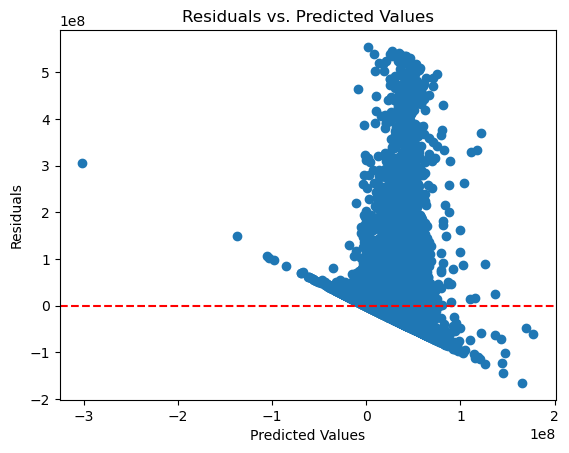

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict

# Assuming X and y are already defined

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Get cross-validated predictions
y_pred = cross_val_predict(linear_model, X, y, cv=5)

# Calculate residuals
residuals = y - y_pred

# Plotting the residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


Now lets look how the Lasso perform compared to linear regression 

In [28]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

# Start by finding the best alpha for the L1 regression to optimize the model
# Setting up a range of alpha values to test
alphas = np.logspace(-4, 0.01, 10)

# Initialize and train the LassoCV model to find the best alpha
lasso_cv_model = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_cv_model.fit(X_train, y_train)

# Optimal alpha found by LassoCV
optimal_alpha = lasso_cv_model.alpha_

# Initialize the Lasso regression model (L1 regularization)
# Setting the alpha to the optimal alpha found above
lasso_model = Lasso(alpha=optimal_alpha, random_state=30)

# Training the Lasso regression model
lasso_model.fit(X_train, y_train)

# Predicting the test set results
y_pred_lasso = lasso_model.predict(X_test)

# Evaluating the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Returning the evaluation metrics
print(f'MSE (Lasso): {mse_lasso}, RMSE (Lasso): {rmse_lasso}, R-squared (Lasso): {r2_lasso}')

MSE (Lasso): 3823608305186181.0, RMSE (Lasso): 61835332.17494818, R-squared (Lasso): 0.0837274451544402


To try further explore the model and make it better we implement a GridSearch for the Lasso regression model below:

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# X_train, y_train, X_test, y_test are already defined

# Define the parameter grid for GridSearch
param_grid = {
    'alpha': [0.1, 1, 10, 100],
    'max_iter': [1000, 5000, 10000],
    'tol': [0.0001, 0.001, 0.01]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=Lasso(random_state=42), param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
best_parameters = grid_search.best_params_

# Output the best parameters
best_parameters

{'alpha': 100, 'max_iter': 1000, 'tol': 0.0001}

Here we use the "best parameters" to see the change in MSE, RMSE and R-squared

In [101]:
# Initialize the Lasso regression model with the best parameters
best_lasso_model = Lasso(**best_parameters, random_state=42)

# Training the Lasso regression model with the best parameters
best_lasso_model.fit(X_train, y_train)

# Predicting the test set results using the best model
y_pred_best_lasso = best_lasso_model.predict(X_test)

# Evaluating the best model
mse_best_lasso = mean_squared_error(y_test, y_pred_best_lasso)
rmse_best_lasso = np.sqrt(mse_best_lasso)
r2_best_lasso = r2_score(y_test, y_pred_best_lasso)

print(f'MSE (Lasso): {mse_best_lasso}, RMSE (Lasso): {rmse_best_lasso}, R-squared (Lasso): {r2_best_lasso}')

MSE (Lasso): 3650393662497365.0, RMSE (Lasso): 60418487.75414165, R-squared (Lasso): 0.08279617417908447


Now we try to experiment with Gradiant Booster Regressor to see how it perform in iteration 3

In [102]:
#Here we create a gradient tree boosting regressor model
from sklearn.ensemble import GradientBoostingRegressor

# X_train, y_train, X_test, y_test are already defined

# Initialize and train the Gradient Boosting Regressor and adjusting model complexity
# Models complexity have been selected based on several tries, and what performed the "best".
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred_gbr = gbr_model.predict(X_test)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

# Returning the evaluation metrics
print(f'MSE (gbr): {mse_gbr}, RMSE (gbr): {rmse_gbr}, R-squared (gbr): {r2_gbr}')

MSE (gbr): 2871076330363802.5, RMSE (gbr): 53582425.57372522, R-squared (gbr): 0.27860870966119944


Now we implement Random Search for Gradient Booster Regressor, because GridSearch was to complex for Gradient Booster. 

In [103]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import uniform, randint
import numpy as np

# X_train, y_train, X_test, y_test are already defined

# Define the parameter distributions for RandomizedSearchCV
param_distributions = {
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(2, 6),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'subsample': uniform(0.8, 0.2)
}

# Create RandomizedSearchCV object for GradientBoostingRegressor
random_search_gbr = RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=42), 
                                       param_distributions=param_distributions, 
                                       n_iter=10, 
                                       scoring='neg_mean_squared_error', 
                                       cv=5, 
                                       random_state=42,
                                       verbose=1)

# Fit RandomizedSearchCV
random_search_gbr.fit(X_train, y_train)

# Best parameters
best_parameters_gbr = random_search_gbr.best_params_

# Using the best parameters to train and evaluate the model
best_gbr_model = GradientBoostingRegressor(**best_parameters_gbr, random_state=42)
best_gbr_model.fit(X_train, y_train)

# Predicting and evaluating the best model
y_pred_best_gbr = best_gbr_model.predict(X_test)
mse_best_gbr = mean_squared_error(y_test, y_pred_best_gbr)
rmse_best_gbr = np.sqrt(mse_best_gbr)
r2_best_gbr = r2_score(y_test, y_pred_best_gbr)

# Print the evaluation metrics for the best model
print(f'MSE (Best GBR): {mse_best_gbr}, RMSE (Best GBR): {rmse_best_gbr}, R-squared (Best GBR): {r2_best_gbr}')
print(f'Best Parameters: {best_parameters_gbr}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
MSE (Best GBR): 2590181037793240.0, RMSE (Best GBR): 50893821.21430106, R-squared (Best GBR): 0.3491869159647206
Best Parameters: {'learning_rate': 0.13022300234864176, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 102, 'subsample': 0.9939819704323989}


Now we wanna try to do the same, but using XGBoost Regressor 


In [32]:
#Implementing a XGBoost model
import xgboost as xgb

# Initialize and train the XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)


# Returning the evaluation metrics
print("Mean Squared Error:", mse_xgb)
print("Root Mean Squared Error:", rmse_xgb)
print("R-squared:", r2_xgb)

Mean Squared Error: 2974540718945119.0
Root Mean Squared Error: 54539350.188145064
R-squared: 0.28719423996876126


Here we use gridsearch to further investigate and tune the XGBoost model

In [35]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define a range of hyperparameters for GridSearch
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Create GridSearchCV object for XGBRegressor
grid_search_xgb = GridSearchCV(estimator=XGBRegressor(random_state=42), 
                               param_grid=param_grid, 
                               scoring='neg_mean_squared_error', 
                               cv=5, 
                               verbose=1)

# Fit GridSearchCV
grid_search_xgb.fit(X_train, y_train)

# Best parameters
best_parameters_xgb = grid_search_xgb.best_params_

# Output the best parameters
best_parameters_xgb

# Using the best parameters to train and evaluate the model
best_xgb_model = XGBRegressor(**best_parameters_xgb, random_state=42)
best_xgb_model.fit(X_train, y_train)

# Predicting and evaluating the best model
y_pred_best_xgb = best_xgb_model.predict(X_test)
mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
rmse_best_xgb = np.sqrt(mse_best_xgb)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

# Print the evaluation metrics for the best model
print('Best Mean Square Error:', mse_best_xgb) 
print('Best Root Mean Square Error:', rmse_best_xgb) 
print('Best R-squared:', r2_best_xgb)



Fitting 5 folds for each of 729 candidates, totalling 3645 fits


KeyboardInterrupt: 